In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
plt.rcParams.update({'font.size': 8})

# Hello World mnist (pytorch)

支援python 版本: 3.5以上
支援pytorch版本 : 1.2以上

這次實作要使用的是深度學習界的Hello world也就是手寫數字數據集MNIST(別誤寫為MINIST歐)。MNIST 數據集來自美國國家標準與技術研究所, National Institute of St andards and Technology (NIST). 訓練集 (training set) 由來自 250 個不同人手寫的數字構成, 其中 50% 是高中學生, 50% 來自人口普查局 (the Census Bureau) 的工作人員. 測試集(test set) 也是同樣比例的手寫數字數據。基本上這個數據集毫無挑戰性，任何神經網路幾乎都能獲得很好的擬合效果，所以它也很常被做為新算法觀念驗證使用。

In [2]:
import os
os.environ['TRIDENT_BACKEND'] = 'pytorch'
import trident as T
from trident import *

trident 0.5.1
Using Pytorch backend.
Image Data Format: channels_first.
Image Channel Order: rgb.
Pytorch version:1.4.0.
Using pillow image backend.
Pillow version:6.2.1.


In [3]:
data_provider=T.load_mnist('mnist') #讀取mnist數據集
data_provider.image_transform_funcs=[normalize(127.5,127.5)] #在圖像預處理流程中加入正規化
data,label=data_provider.next()
print(data.shape,label.shape)
print(data_provider.signature)

img_list=[random.choice(data_provider.get_all_data(is_shuffle=True)).reshape((28,28)) for i in range(10)]#從全體圖像數據(get_all_data())抽10筆
                        
merged_img=array2image(np.concatenate(img_list,axis=1)) #沿著x軸(axis=1)疊合後，利用array2image轉成圖檔


merged_img #顯示圖片

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping class_names  in en-US   success, total 10 class names added.
(8, 28, 28) (8,)
OrderedDict([('data', (28, 28)), ('label', <class 'int'>)])


In [4]:
fdataset=T.load_mnist('fashion-mnist') #讀取fashion mnist數據集

img_list2=[random.choice(fdataset.get_all_data(is_shuffle=True)).reshape((28,28)) for i in range(10)]#從全體圖像數據(get_all_data())抽10筆               
merged_img2=array2image(np.concatenate(img_list2,axis=1)) #沿著x軸(axis=1)疊合後，利用array2image轉成圖檔

merged_img2 #顯示圖片

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping class_names  in en-US   success, total 10 class names added.


In [5]:
net1=Sequential(
    Flatten(),
    Dense(128,use_bias=False,activation='leaky_relu'),
    Dense(32,use_bias=False,activation='leaky_relu'),
    Dense(16,use_bias=False,activation='leaky_relu'),
    Dense(2,use_bias=False,activation=None,keep_output=True),
    Dense(10,use_bias=False,activation='softmax'))

In [6]:
#加入批次正規化
net2=Sequential(
    Flatten(),
    Dense(128,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(32,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(16,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(2,use_bias=False,activation=None,keep_output=True),
    Dense(10,use_bias=False,activation='softmax'))

#加入Dropout
net3=Sequential(
    Flatten(),
    Dense(128,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dropout(0.2),
    Dense(32,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(16,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(2,use_bias=False,activation=None,keep_output=True),
    Dense(10,use_bias=False,activation='softmax'))



In [7]:
model1=Model(input_shape=(28,28),output=net1)\
    .with_optimizer(optimizer='Adam',lr=2e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)

model2=Model(input_shape=(28,28),output=net2)\
    .with_optimizer(optimizer='Adam',lr=2e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)

model3=Model(input_shape=(28,28),output=net3)\
    .with_optimizer(optimizer='Adam',lr=2e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)


CrossEntropyLoss signature:[('output', [10]), ('target', [10])]
accuracy signature:[('output', [10]), ('target', [10])]
CrossEntropyLoss signature:[('output', [10]), ('target', [10])]
accuracy signature:[('output', [10]), ('target', [10])]
CrossEntropyLoss signature:[('output', [10]), ('target', [10])]
accuracy signature:[('output', [10]), ('target', [10])]


In [8]:
model1.summary()
model2.summary()
model3.summary()

--------------------------------------------------------------------------------------------------------------------------------
              Layer (type)                   Output Shape            Weight           Bias    Param #     FLOPS #   
flatten_3                                [-1, 784]                                            0         0.0         
dense_9                                  [-1, 128]             [128, 784]                     100352    200703.0    
dense_10                                 [-1, 32]              [32, 128]                      4096      8191.0      
dense_11                                 [-1, 16]              [16, 32]                       512       1023.0      
dense_12                                 ★[-1, 2]              [2, 16]                        32        63.0        
dense_13                                 [-1, 10]              [10, 2]                        20        39.0        
Total params: 105,012
Trainable params: 105,012
Non-

In [9]:
plan=TrainingPlan()\
    .add_training_item(model1)\
    .add_training_item(model2)\
    .add_training_item(model3)\
    .with_data_loader(data_provider)\
    .within_minibatch_size(128)\
    .print_progress_scheduling(250,unit='batch')\


plan.only_steps(num_steps=2500,collect_data_inteval=50,keep_weights_history=True,keep_gradient_history=True)

data_feed for model 0 :OrderedDict([('x', 'data'), ('output', 'output'), ('target', 'label')])
data_feed for model 1 :OrderedDict([('x', 'data'), ('output', 'output'), ('target', 'label')])
data_feed for model 2 :OrderedDict([('x', 'data'), ('output', 'output'), ('target', 'label')])
model 0      Step: 19s26ms  | Loss: 2.303   | accuracy: 6.250%   | learning rate: 2.000e-03 | epoch: 0  ( 0/2500 )
OrderedDict([('total_losses', 2.302506923675537), ('CrossEntropyLoss', 2.302506923675537)])
model 1      Step: 56ms     | Loss: 2.299   | accuracy: 14.062%  | learning rate: 2.000e-03 | epoch: 0  ( 0/2500 )
OrderedDict([('total_losses', 2.2992184162139893), ('CrossEntropyLoss', 2.2992184162139893)])
model 2      Step: 61ms     | Loss: 2.307   | accuracy: 7.031%   | learning rate: 2.000e-03 | epoch: 0  ( 0/2500 )
OrderedDict([('total_losses', 2.3070807456970215), ('CrossEntropyLoss', 2.3070807456970215)])
model 0      Step: 21s929ms | Loss: 2.021   | accuracy: 43.063%  | learning rate: 2.000e-0

True

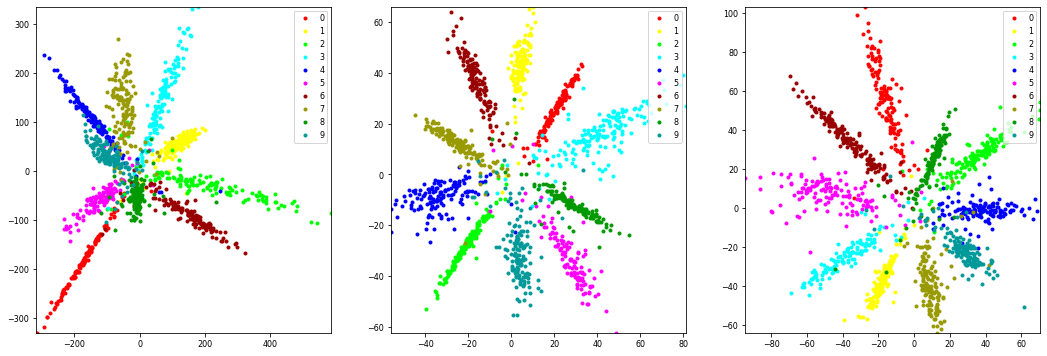

In [10]:

#plan.training_items[0].model[:4]
#plan.training_items[1].model[:11]


def centerloss_plot(plt,feat, labels,title=''):
    
    c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff',
         '#ff00ff', '#990000', '#999900', '#009900', '#009999']
    for i in range(10):
        plt.plot(feat[labels == i, 0], feat[labels == i, 1], '.', c=c[i])
    plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], loc = 'upper right')
    plt.xlim(xmin=feat[:,0].min(),xmax=feat[:, 0].max())
    plt.ylim(ymin=feat[:,1].min(),ymax=feat[:, 1].max())
    plt.title(title)
    
    
    
fig = plt.figure(figsize=(18,6)) 
plt.clf()
plt.ion()  # is not None:
for k in [1,2,3]:
    plt.subplot(1, 3, k)
    feats_result=[]
    label_result=[]
    fm=Sequential(plan.training_items[k-1].model[:-1])#取出指定model的從第一層到倒數第二層，將它置入於Sequentiqal中
    for i,(data,label) in enumerate(data_provider):
        data=to_tensor(data)
        _=plan.training_items[k-1].model(data)
        feats=plan.training_items[k-1].model[-2].output
        feats=to_numpy(feats)
        
        feats_result.append(feats)
        label_result.append(label)  
        if i==10:
            break

    feats_result=np.concatenate(feats_result,axis=0)
    label_result=np.concatenate(label_result,axis=0)
    plt.title('model {0}'.format(i))
    centerloss_plot(plt,feats_result,label_result)
plt.ioff() 
display.display(plt.gcf())
plt.close(fig)

剛才的圖表代表甚麼意思呢? 這個圖表是來自於center loss的概念，他提醒了一個我們常常忘記了的關鍵「決策邊界」，也就是機器在做最後判斷時的分界，softmax雖然效果很好，但是他的決策邊界圖示像花朵一樣，越靠近中心點的位置，其實就是預測會錯誤的地方，當然center loss就是在解決這個問題，把這個觀念放到我們剛剛從mnist學習的三個模型來看，你會發現在最左邊基線模型其實決策邊界是混淆不堪的，有加了batch normalization(中間)很明顯決策邊界會清晰很多，加了dropout後，決策邊界又變得更銳利，從這邊就可以看的出來這幾個機制的效用。雖然基線模型在訓練時看起來準確度都不算差，但是較模糊的決策邊界意味著將很難通用。

![Alt text](../images/center_loss.jpg)

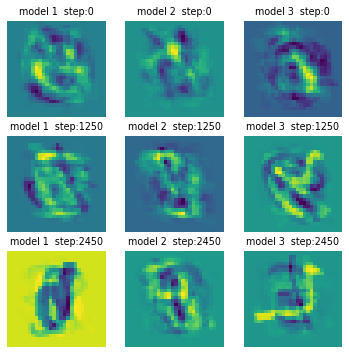

In [11]:
grad_dict={}

for i in  range(3):
    grad_dict[i]=[]
    for j in range(len(plan.training_items[i].gradients_history)):
        grad_dict[i].append(to_numpy(plan.training_items[i].gradients_history[j].value_list[0].copy()).mean(0))
        
fig =plt.figure(figsize=(6,6))
plt.clf()
plt.ion()  
for j in range(3):
    for i in [1,2,3]:
        plt.subplot(3,3, 3*j+i)
        n=[0,len(grad_dict[i-1])//2,len(grad_dict[i-1])-1][j]
        grad_grid=grad_dict[i-1][n].reshape([28,28])
        plt.pcolor(grad_grid)
        plt.title('model {0}  step:{1}'.format(i,n*50))
        plt.axis("off")
plt.ioff() 
display.display(fig)
plt.close(fig)